In [0]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
#1. Import and store the data in a data frame.
gc_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/R4L2/german_credit.csv") 

In [4]:
gc_df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [126]:
gc_df.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [0]:
from sklearn.model_selection import train_test_split
dv = gc_df.drop('default', axis=1)
idv = gc_df[['default']]
dv_train, dv_test, idv_train, idv_test = train_test_split(dv, idv, test_size=0.50, random_state=2)

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [128]:
# Print Shape of model data
dv.shape

(1000, 20)

In [129]:
dv_train.eq(np.infty).any()

account_check_status          False
duration_in_month             False
credit_history                False
purpose                       False
credit_amount                 False
savings                       False
present_emp_since             False
installment_as_income_perc    False
personal_status_sex           False
other_debtors                 False
present_res_since             False
property                      False
age                           False
other_installment_plans       False
housing                       False
credits_this_bank             False
job                           False
people_under_maintenance      False
telephone                     False
foreign_worker                False
dtype: bool

In [134]:
dv_train.dtypes

account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [140]:
dv_train.columns

Index(['account_check_status', 'duration_in_month', 'credit_history',
       'purpose', 'credit_amount', 'savings', 'present_emp_since',
       'installment_as_income_perc', 'personal_status_sex', 'other_debtors',
       'present_res_since', 'property', 'age', 'other_installment_plans',
       'housing', 'credits_this_bank', 'job', 'people_under_maintenance',
       'telephone', 'foreign_worker'],
      dtype='object')

In [0]:
for idx in ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 
            'property', 'other_installment_plans','housing', 'job','telephone', 'foreign_worker']:
  dv_train_occ = pd.get_dummies(data = dv_train[idx], dummy_na = False)
  dv_train = pd.concat([dv_train, dv_train_occ], axis = 1)

In [142]:
dv_train.shape

(500, 74)

In [0]:
dv_train.head(3)

In [0]:
dv_train['account_check_status']=pd.get_dummies(dv_train['account_check_status'])

In [0]:
dv_train['credit_history']=pd.get_dummies(dv_train['credit_history'])
dv_train['purpose']=pd.get_dummies(dv_train['purpose'])
dv_train['savings']=pd.get_dummies(dv_train['savings'])
dv_train['present_emp_since']=pd.get_dummies(dv_train['present_emp_since'])
dv_train['personal_status_sex']=pd.get_dummies(dv_train['personal_status_sex'])
dv_train['other_debtors']=pd.get_dummies(dv_train['other_debtors'])
dv_train['property']=pd.get_dummies(dv_train['property'])
dv_train['other_installment_plans']=pd.get_dummies(dv_train['other_installment_plans'])
dv_train['housing']=pd.get_dummies(dv_train['housing'])
dv_train['job']=pd.get_dummies(dv_train['job'])
dv_train['telephone']=pd.get_dummies(dv_train['telephone'])
dv_train['foreign_worker']=pd.get_dummies(dv_train['foreign_worker'])

['account_check_status', 'credit_history',
       'purpose', 'savings', 'present_emp_since',
       'personal_status_sex', 'other_debtors',
       'property', 'other_installment_plans',
       'housing', 'job',
       'telephone', 'foreign_worker']

In [14]:
dv_train.dtypes

account_check_status          uint8
duration_in_month             int64
credit_history                uint8
purpose                       uint8
credit_amount                 int64
savings                       uint8
present_emp_since             uint8
installment_as_income_perc    int64
personal_status_sex           uint8
other_debtors                 uint8
present_res_since             int64
property                      uint8
age                           int64
other_installment_plans       uint8
housing                       uint8
credits_this_bank             int64
job                           uint8
people_under_maintenance      int64
telephone                     uint8
foreign_worker                uint8
dtype: object

### Check for highly correlated variables but don't required any treatment for this use case

In [15]:
dv_train.corr()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
account_check_status,1.000000,0.085941,0.041822,0.074181,0.128524,0.067177,-0.049417,-0.008348,-0.062380,-0.021299,-0.066895,-0.024760,-0.025537,0.034695,0.022821,-0.046558,0.038483,-0.025575,0.010271,-0.039524
duration_in_month,0.085941,1.000000,0.017533,0.015231,0.622181,-0.072589,-0.006327,0.088370,-0.089770,0.043772,-0.000956,-0.066626,-0.050537,0.011412,0.173091,-0.026484,0.146828,-0.044566,-0.169769,-0.151229
credit_history,0.041822,0.017533,1.000000,0.024336,-0.032416,0.060852,-0.044460,0.021100,0.012123,0.061616,0.077502,-0.055298,-0.014226,0.255203,0.045607,-0.105992,0.053099,0.105547,0.003410,0.000661
purpose,0.074181,0.015231,0.024336,1.000000,0.024409,0.034343,0.043214,0.015070,0.025470,-0.038111,0.097910,-0.034755,0.149455,0.089087,0.213844,-0.000403,-0.033397,0.109738,0.005074,-0.042126
credit_amount,0.128524,0.622181,-0.032416,0.024409,1.000000,-0.064806,0.004891,-0.254762,-0.104136,0.076079,0.025755,-0.046339,0.049061,-0.017586,0.194763,-0.016023,0.348524,0.003884,-0.272156,-0.090613
savings,0.067177,-0.072589,0.060852,0.034343,-0.064806,1.000000,0.037087,0.031067,0.038298,-0.038938,0.003398,0.026088,0.056993,-0.019275,-0.024543,0.075740,-0.036367,0.027819,0.031102,0.007595
present_emp_since,-0.049417,-0.006327,-0.044460,0.043214,0.004891,0.037087,1.000000,0.111101,-0.111209,-0.013999,0.324973,-0.043769,0.378344,0.080845,0.228897,0.091160,0.111859,0.171842,-0.111478,-0.082829
installment_as_income_perc,-0.008348,0.088370,0.021100,0.015070,-0.254762,0.031067,0.111101,1.000000,-0.092620,0.020391,-0.025759,-0.063013,0.047449,0.011976,0.008656,0.014374,0.028580,-0.076721,-0.008989,-0.070159
personal_status_sex,-0.062380,-0.089770,0.012123,0.025470,-0.104136,0.038298,-0.111209,-0.092620,1.000000,0.038712,0.081061,0.026852,-0.132827,-0.037761,-0.099047,-0.057878,-0.044909,-0.190113,0.089208,-0.082052
other_debtors,-0.021299,0.043772,0.061616,-0.038111,0.076079,-0.038938,-0.013999,0.020391,0.038712,1.000000,0.071201,-0.007123,-0.002537,-0.003395,0.053557,0.037762,0.040001,-0.039558,-0.064646,-0.031842


### Drop the original variables which are converted to dummy

In [0]:
for idx in ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 
            'property', 'other_installment_plans','housing', 'job','telephone', 'foreign_worker']:
  dv_train.drop(idx,axis=1, inplace=True)

In [148]:
dv_train.shape

(500, 61)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dv_train, idv_train, test_size=0.30, random_state=30)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [0]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
clfr.fit(X_train, y_train)
y_pred = clfr.predict(X_test)

In [152]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
aucScore=accuracy_score(y_test, y_pred)

In [155]:
print("Accuracy Score: ", aucScore*100, "%")

Accuracy Score:  79.33333333333333 %


### Q6 Show the list of the features importance( 1 Marks)

In [156]:
clfr.feature_importances_

array([0.07559963, 0.09157134, 0.0333101 , 0.03148219, 0.07652007,
       0.01631149, 0.01241508, 0.01605681, 0.03696262, 0.00657844,
       0.05060625, 0.00816052, 0.01998874, 0.0100577 , 0.01514084,
       0.00661166, 0.0091912 , 0.00923677, 0.02116573, 0.00985499,
       0.01560174, 0.00604064, 0.00172375, 0.01227176, 0.0029254 ,
       0.00010766, 0.00537384, 0.02039237, 0.00893251, 0.00707586,
       0.01325271, 0.01440264, 0.01291384, 0.01418314, 0.0148043 ,
       0.01064905, 0.01590961, 0.00666127, 0.00730266, 0.01514355,
       0.00396871, 0.00369779, 0.00593179, 0.01573949, 0.01562255,
       0.02487365, 0.01581148, 0.01791855, 0.01595777, 0.00468077,
       0.0094327 , 0.01653744, 0.01197432, 0.01370136, 0.01563819,
       0.0023165 , 0.01130146, 0.01384959, 0.01361197, 0.00257921,
       0.00236424])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(dv_train)
y = scaler.fit_transform(idv_train)

In [0]:
kfold = KFold(n_splits=10, random_state=77, shuffle=False)

In [161]:
for train_index, test_index in kfold.split(dv_train):
  X1_train, X1_test = X[train_index], X[test_index]
  y1_train, y1_test = y[train_index], y[test_index]
  res = cross_val_score(clfr, X1_train, y1_train, cv=kfold)
print(res)


[0.91111111 0.73333333 0.77777778 0.73333333 0.66666667 0.71111111
 0.84444444 0.82222222 0.77777778 0.73333333]


In [162]:
#Calculate Mean score
print("Accuracy Mean Score is: ", res.mean()*100.0, "%")

Accuracy Mean Score is:  77.11111111111111 %


In [163]:
# Calculate score standard deviation using std()
print("Accuracy standard deviation is: ", res.std()*100.0, "%")

Accuracy standard deviation is:  6.816827400079098 %


# Q8 Print the confusion matrix( 1 Marks)

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix1)

[[101   8]
 [ 23  18]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [166]:
print("True Positive Rate: ", 101 / (101 + 23))

True Positive Rate:  0.8145161290322581


In [0]:
from sklearn.metrics import precision_recall_curve

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

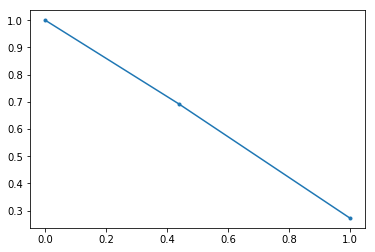

In [169]:
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

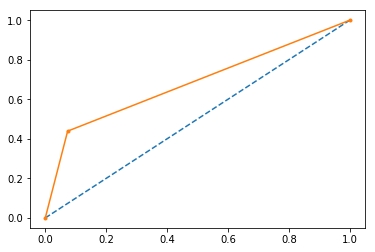

In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [0]:
auc = auc(recall, precision)

In [173]:
print("Auc is :", auc*100, "%")

Auc is : 64.23327079424641 %


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
